In [58]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [59]:
#Read in the csv file and convert to a Pandas dataframe
df_Football_Players = pd.read_csv("..\..\data\clean_data.csv")

In [60]:
df_Football_Players.shape

(9592, 23)

## Model




### Feature engineering: 

- Feature scaling
- Aggregation
- One hot coding

-------------------

In [61]:
df_Football_Players = df_Football_Players.drop(['name','player'],axis=1)

In [64]:
categorical_features = df_Football_Players.select_dtypes(include=object).columns
numeric_features = df_Football_Players.select_dtypes(include=np.number).columns
categorical_features

Index(['team', 'position'], dtype='object')

#### 3. Feature selection


In [65]:
correlation = df_Football_Players.corr(numeric_only=True)
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.823238
appearance             0.434929
minutes played         0.425730
award                  0.169668
goals                  0.161335
games_injured          0.151401
days_injured           0.134927
assists                0.114660
position_encoded       0.081631
height                 0.036746
yellow cards           0.033388
winger                 0.022545
second yellow cards   -0.006242
red cards             -0.009857
clean sheets          -0.016229
goals conceded        -0.077397
age                   -0.081178
Unnamed: 0            -0.434621
Name: current_value, dtype: float64


In [66]:
# Select 4 columns : 
df_Football_Players = df_Football_Players[['appearance','minutes played','Unnamed: 0','current_value']]

In [67]:
df_Football_Players.head()

,appearance,minutes played,Unnamed: 0,current_value
0,15,1304,1,1500000
1,34,2758,8,2000000
2,89,7132,10,22000000
3,34,2686,11,10000000
4,39,2788,20,800000


In [68]:
df_Football_Players.shape

(9592, 4)

### Prepare train and test data


In [13]:
# Prepare data
X = df_Football_Players

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
X.shape

(9592, 4)

### Build the model

In [15]:
wcss = []
for i in range(1, 20):  # Test 1 to 20 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

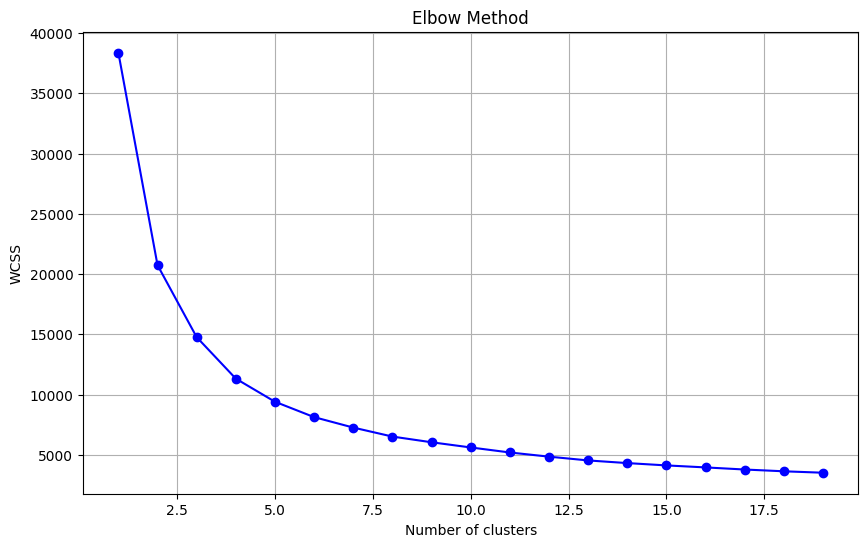

In [16]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [17]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

### Train and Test the Model

In [18]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

### Evaluating the Model

In [19]:
X.head(2)


,appearance,minutes played,Unnamed: 0,current_value
0,15,1304,1,1500000
1,34,2758,8,2000000


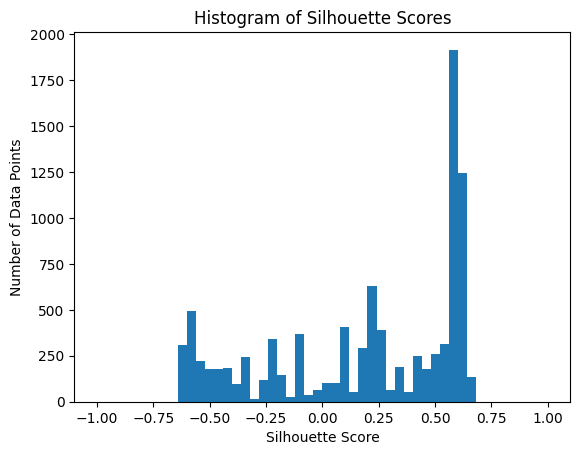

Silhouette average score: 0.18450047566284336


In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [21]:
silhouette_scores

array([0.09716121, 0.09419449, 0.55913002, ..., 0.593915  , 0.59391648,
       0.58797583])

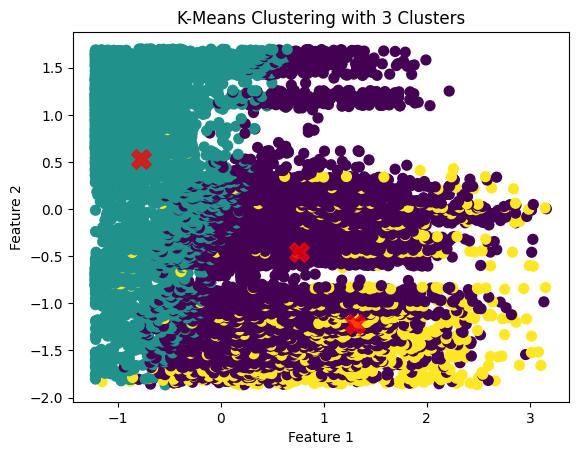

In [22]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [23]:
X['kmeans'] = y_pred

In [24]:
X['kmeans'].value_counts()

kmeans
1    4978
0    3937
2     677
Name: count, dtype: int64

In [40]:
X[X['kmeans']==1].sort_values('current_value')

,appearance,minutes played,Unnamed: 0,current_value,kmeans
7278,0,0,8316,0,1
6342,8,808,7335,0,1
8066,10,667,9163,0,1
8074,1,0,9171,0,1
8078,0,0,9175,0,1
...,...,...,...,...,...
7167,10,686,8193,11000000,1
6480,20,1395,7480,12000000,1
2875,9,719,3625,12000000,1
2865,1,22,3615,12000000,1


<Axes: xlabel='current_value', ylabel='appearance'>

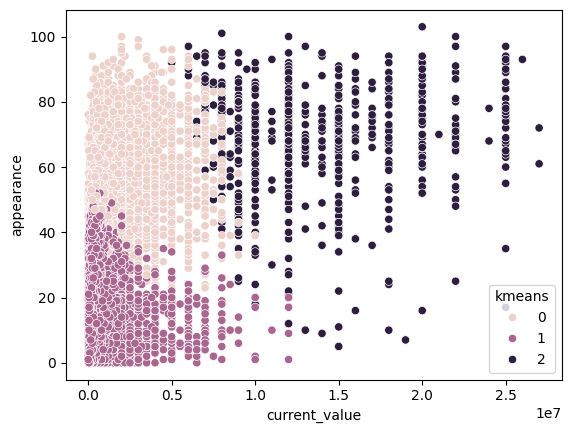

In [26]:
sns.scatterplot(data = X , x = 'current_value', y = 'appearance', hue = 'kmeans')


<Axes: xlabel='current_value', ylabel='minutes played'>

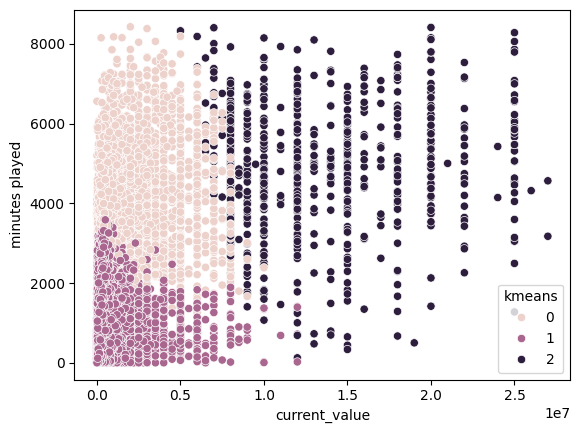

In [27]:
sns.scatterplot(data = X , x = 'current_value', y = 'minutes played', hue = 'kmeans')


In [ ]:
# Scatter_3d Plot will shows in browser

import plotly
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"  # Opens the plot in a web browser


fig = px.scatter_3d(X, x='appearance', y='minutes played', z='current_value',
              color='kmeans')
fig.show()